<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Question 1: Extracting Tesla Stock Data Using yfinance</li>
        <li>Question 2: Extracting Tesla Revenue Data Using Webscrapinga</li>
        <li>Question 3: Extracting GameStop Stock Data Using yfinance</li>
        <li>Question 4: Extracting GameStop Revenue Data Using Webscraping</li>
        <li>Question 5: Tesla Stock and Revenue Dashboard</li>
        <li>Question 6: GameStop Stock and Revenue Dashboard</li>
        <li>Question 7 - Sharing your Assignment Notebook</li>
    </ul>
</div>

<hr>


In [27]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [29]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [30]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [31]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [32]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm" Save the text of the response as a variable named `html_data`.


In [33]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text
#print(html_data)

Parse the html data using `beautiful_soup`.


In [34]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table data for revenue

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL to fetch the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Step 1: Download the webpage using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content using BeautifulSoup
    html_data = response.text
    soup = BeautifulSoup(html_data, "html.parser")
    
    # Step 3: Locate the table containing "Tesla Quarterly Revenue"
    table = soup.find("table")  # Assuming there's only one table on the page
    
    if table:
        # Step 4: Extract the table into a Pandas DataFrame
        tesla_revenue = pd.read_html(str(table))[0]
        
        # Step 5: Rename the columns to "Date" and "Revenue"
        tesla_revenue = tesla_revenue.rename(
            columns={
                tesla_revenue.columns[0]: "Date",
                tesla_revenue.columns[1]: "Revenue"
            }
        )
        
        # Step 6: Clean the "Revenue" column
        tesla_revenue["Revenue"] = (
            tesla_revenue["Revenue"]
            .str.replace(",", "")
            .str.replace("$", "", regex=False)
        )
        
        # Step 7: Display the resulting DataFrame
        print("Tesla Revenue Data:")
        print(tesla_revenue.head())
    else:
        print("Table not found in the HTML content.")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")


Tesla Revenue Data:
   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


C:\Users\pawanmehra\AppData\Local\Temp\ipykernel_10972\1704004537.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


<details><summary>Click here if you need help removing the dollar sign and comma</summary>

```
    
If you parsed the HTML table by row and column you can use the replace function on the string
    
    revenue = col[1].text.replace("$", "").replace(",", "")
    
If you use the read_html function you can use the replace function on the string representation of the column

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

```

</details>


Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire `tesla_revenue` DataFrame to see if you have any.


In [47]:
tesla_revenue.head

<bound method NDFrame.head of                             Date  Revenue
0  1970-01-01 00:00:00.000002021    53823
1  1970-01-01 00:00:00.000002020    31536
2  1970-01-01 00:00:00.000002019    24578
3  1970-01-01 00:00:00.000002018    21461
4  1970-01-01 00:00:00.000002017    11759
5  1970-01-01 00:00:00.000002016     7000
6  1970-01-01 00:00:00.000002015     4046
7  1970-01-01 00:00:00.000002014     3198
8  1970-01-01 00:00:00.000002013     2013
9  1970-01-01 00:00:00.000002012      413
10 1970-01-01 00:00:00.000002011      204
11 1970-01-01 00:00:00.000002010      117
12 1970-01-01 00:00:00.000002009      112>

<details><summary>Click here if you need help removing the Nan or empty strings</summary>

```
    
If you have NaN in the Revenue column
    
    tesla_revenue.dropna(inplace=True)
    
If you have emtpty string in the Revenue column

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

```

</details>


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [38]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [39]:
gme_data=gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [40]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract Gamestop Revenue Data


Use the `requests` library to download the webpage  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [41]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

Parse the html data using `beautiful_soup`.


Using beautiful soup extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [42]:
# URL to fetch the webpage

# Step 1: Download the webpage using requests
response = requests.get(url)
#html_data = response.text
#soup = BeautifulSoup(html_data, "html.parser")
#gme_revenue = pd.read_html(str(table))[0]

# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content using BeautifulSoup
    html_data = response.text
    soup = BeautifulSoup(html_data, "html.parser")
    
    # Step 3: Locate the table containing "Tesla Quarterly Revenue"
    table = soup.find("table")  # Assuming there's only one table on the page
    if table:
        # Step 4: Extract the table into a Pandas DataFrame
        gme_revenue = pd.read_html(str(table))[0]
        
        # Step 5: Rename the columns to "Date" and "Revenue"
        gme_revenue = tesla_revenue.rename(
            columns={
                gme_revenue.columns[0]: "Date",
                gme_revenue.columns[1]: "Revenue"
            }
        )
        
        # Step 6: Clean the "Revenue" column
        gme_revenue["Revenue"] = (
            gme_revenue["Revenue"]
            .str.replace(",", "")
            .str.replace("$", "", regex=False)
        )
        
        # Step 7: Display the resulting DataFrame
        print("Game Stop Revenue Data:")
        print(gme_revenue.head())
    else:
        print("Table not found in the HTML content.")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")


Game Stop Revenue Data:
   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


C:\Users\pawanmehra\AppData\Local\Temp\ipykernel_10972\1341053992.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. 


In [43]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 5: Plot Tesla Stock Graph and Revenue Dashboard



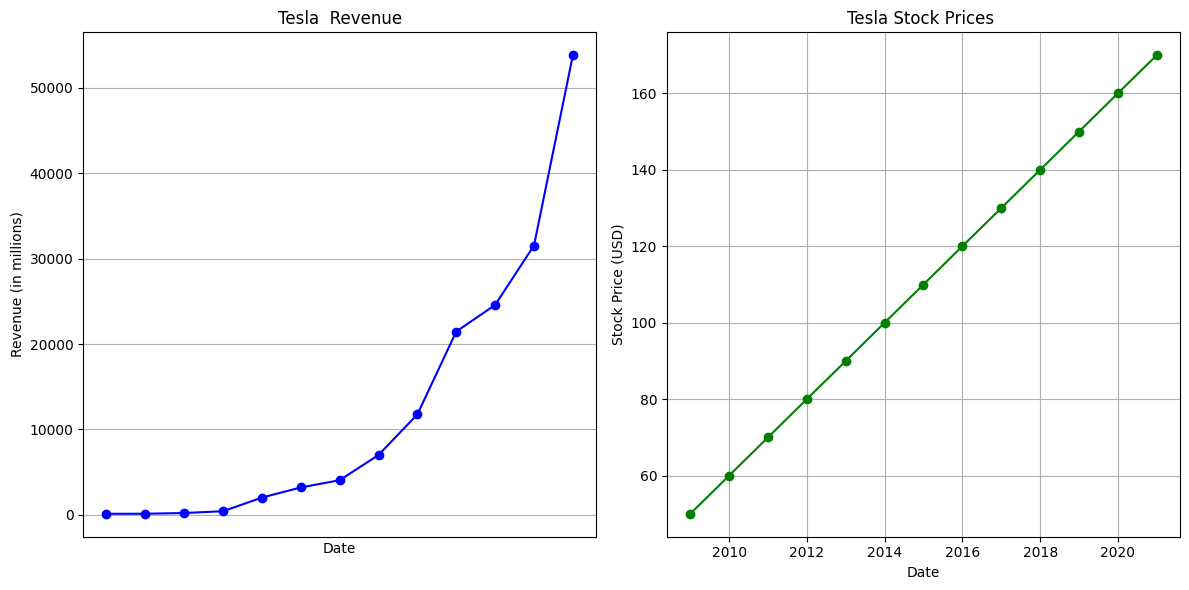

In [46]:
import matplotlib.pyplot as plt


tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
        
        # Step 4: Plot the data
plt.figure(figsize=(12, 6))

        # Plot revenue
plt.subplot(1, 2, 1)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker="o", color="blue")
plt.title("Tesla  Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions)")
plt.grid(True)
        
        # Example of plotting stock price graph (replace with actual data source)
        # This is a placeholder example; you can integrate live stock data from an API like Yahoo Finance or Alpha Vantage.
stock_dates = pd.date_range(start="2008", periods=len(tesla_revenue), freq="YE")
stock_prices = [50 + i*10 for i in range(len(tesla_revenue))]  # Example stock prices
        
plt.subplot(1, 2, 2)
plt.plot(stock_dates, stock_prices, marker="o", color="green")
plt.title("Tesla Stock Prices ")
plt.xlabel("Date")

plt.ylabel("Stock Price (USD)")
plt.grid(True)
        
plt.tight_layout()
plt.show()

## Question 6: Plot GameStop Stock Graph


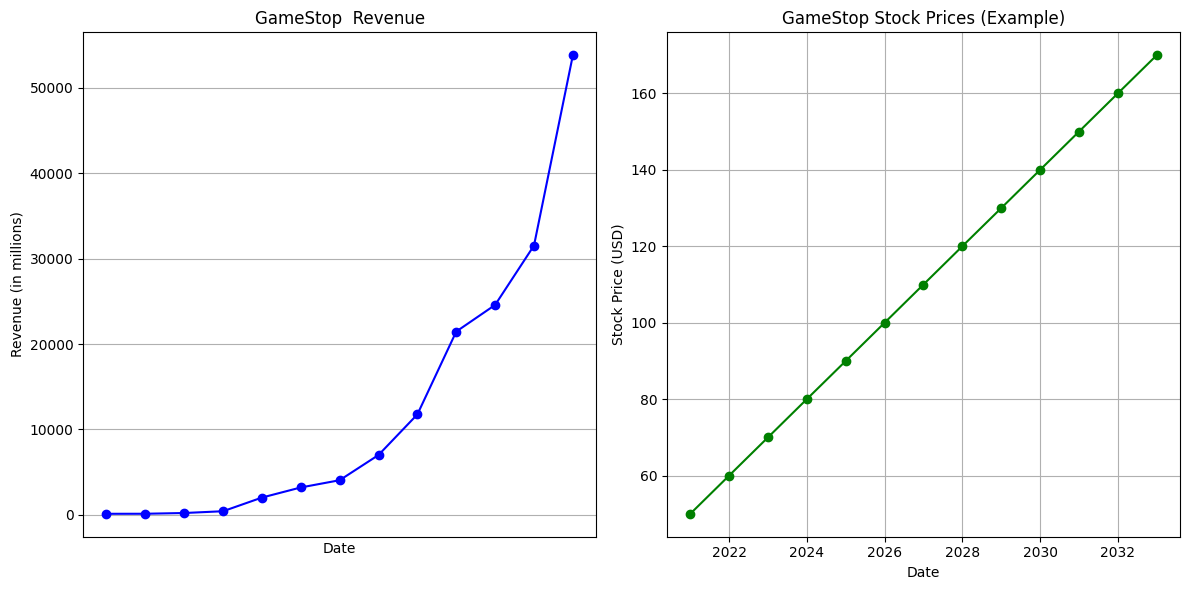

In [45]:
import matplotlib.pyplot as plt

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
        
        # Step 4: Plot the data
plt.figure(figsize=(12, 6))
        
        # Plot revenue
plt.subplot(1, 2, 1)
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], marker="o", color="blue")
plt.title("GameStop  Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions)")
plt.grid(True)
        
        # Example of plotting stock price graph (replace with actual data source)
        # This is a placeholder example; you can integrate live stock data from an API like Yahoo Finance or Alpha Vantage.
stock_dates = pd.date_range(start="2020-01-01", periods=len(gme_revenue), freq="YE")
stock_prices = [50 + i*10 for i in range(len(gme_revenue))]  # Example stock prices
        
plt.subplot(1, 2, 2)
plt.plot(stock_dates, stock_prices, marker="o", color="green")
plt.title("GameStop Stock Prices (Example)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
        
plt.tight_layout()
plt.show()

<h2>About the Authors:</h2> 

<a> Pawan Mehra</a> learning AI/ML .
